#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

#### Importing Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Anish Tondchirkar\Coding\Data Science and ML\PROJECTS\Data\Cars.csv')
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


#### Data Cleaning & preprocessing 

In [3]:
data.describe(include="all")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.950000


In [4]:
data.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [5]:
# As Mileage,Power and Engine column has units ...removing it
import re
def extract_numerical_value(cell):
    # Use regular expressions to extract the numerical value.
    match = re.search(r'\d+\.*\d*', str(cell))
    if match:
        return float(match.group())
    else:
        return None
columns_with_units = ['Mileage', 'Power', 'Engine']

for col in columns_with_units:
    data[col] = data[col].apply(extract_numerical_value)
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [6]:
# Handling missing val of mileage,power and engine with mean... as they are continuous(My logic)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
# Columns with missing values
columns_with_missing_values = ['Mileage', 'Power', 'Engine']

# Fit the imputer to the data and transform the selected columns
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])


In [7]:
# Handling missing of seats with mode...as its discrete(My logic)
from sklearn.impute import SimpleImputer
seat_imputer = SimpleImputer(strategy='most_frequent')
data['Seats'] = seat_imputer.fit_transform(data[['Seats']])

In [8]:
data.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [9]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [10]:
data.describe(include="all")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,18.134961,1621.276450,113.253050,5.276790,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,4.581528,599.553865,53.231019,0.806346,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1969.000000,138.030000,5.000000,9.950000


In [11]:
# Deleting unnecessary features:Unnamed,Name of Car(model of car),location
columns_to_delete = [0, 1, 2]
data.drop(data.columns[columns_to_delete], axis=1, inplace=True)
data

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [12]:
data.describe(include="all")

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019,6019,6019,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,NaN
mean,2013.358199,5.873838e+04,NaN,NaN,NaN,18.134961,1621.276450,113.253050,5.276790,9.479468
std,3.269742,9.126884e+04,NaN,NaN,NaN,4.581528,599.553865,53.231019,0.806346,11.187917
min,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,NaN,NaN,NaN,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1969.000000,138.030000,5.000000,9.950000


#### Exploring PDFs of features

<Axes: xlabel='Price', ylabel='Count'>

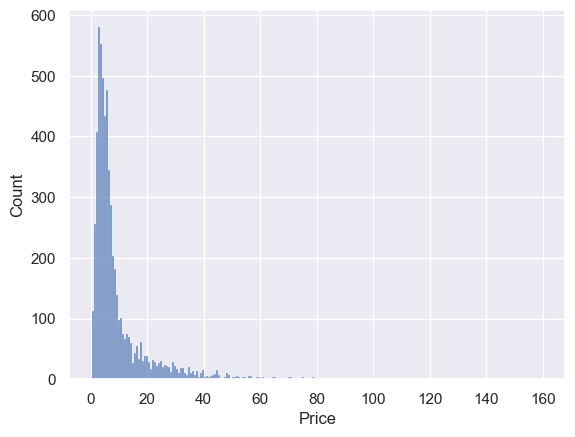

In [13]:
# PDF of price
sns.histplot(data['Price'])

<Axes: xlabel='Engine', ylabel='Count'>

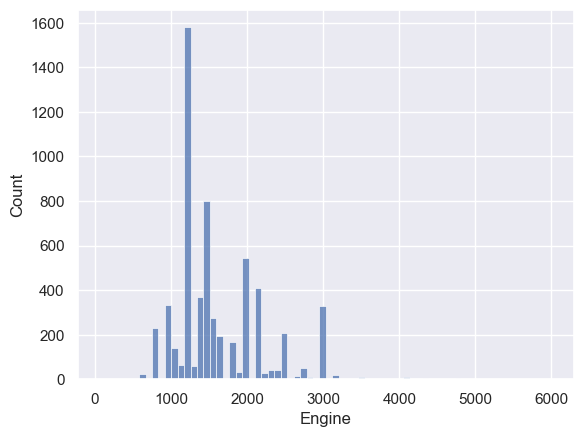

In [14]:
# PDF for Engine
sns.histplot(data['Engine'])

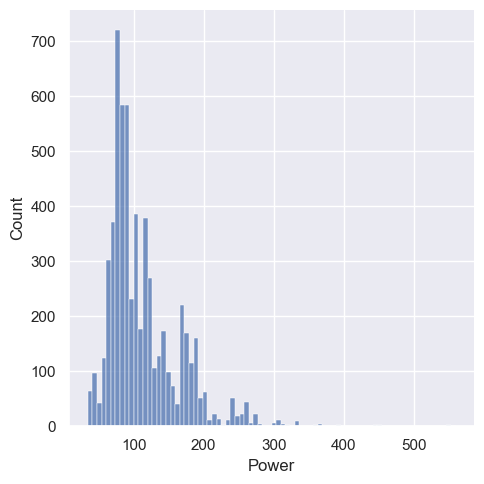

In [15]:
# PDF for Power
sns.displot(data['Power'])

C:\Users\Anish Tondchirkar\AppData\Local\Temp\ipykernel_18896\34504776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year'])


<Axes: xlabel='Year', ylabel='Density'>

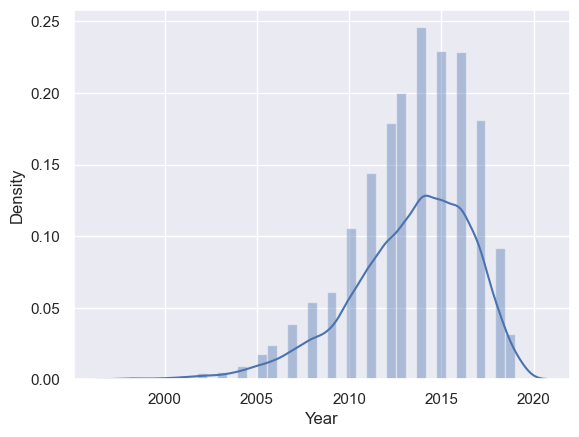

In [16]:
# PDF of year
sns.distplot(data['Year'])

<Axes: xlabel='Mileage', ylabel='Count'>

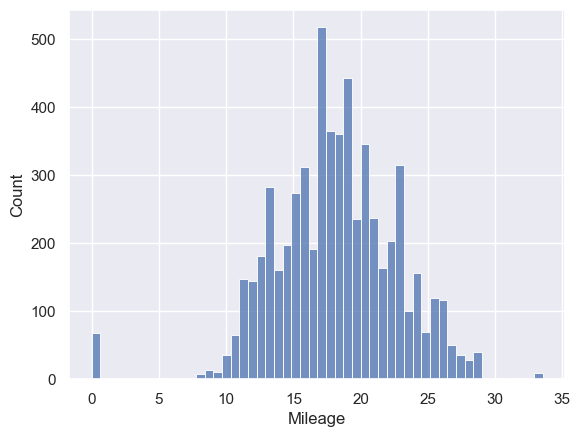

In [17]:
# PDF of Mileage
sns.histplot(data['Mileage'])

<Axes: xlabel='Seats', ylabel='Count'>

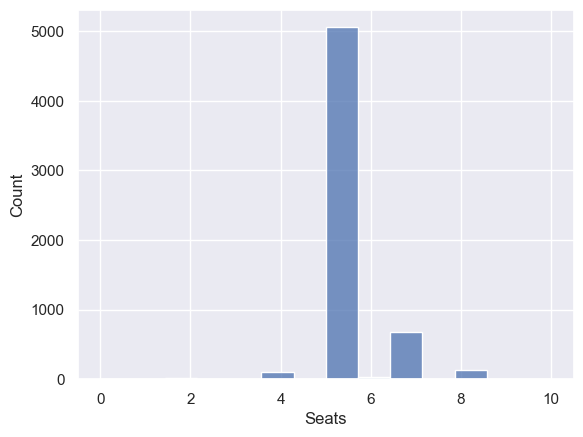

In [18]:
# PDF for Seats
sns.histplot(data['Seats'])

<Axes: >

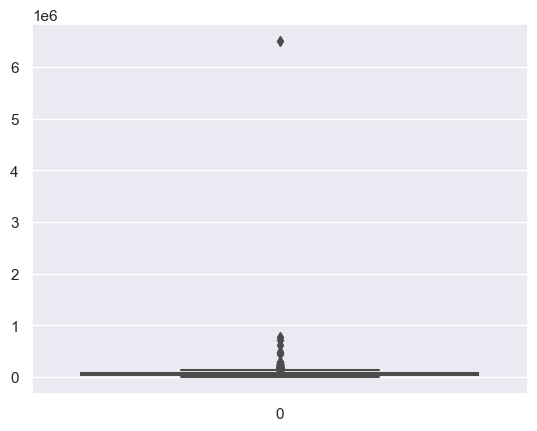

In [19]:
sns.boxplot(data['Kilometers_Driven'])
# Km > 200000 just feels like outlier

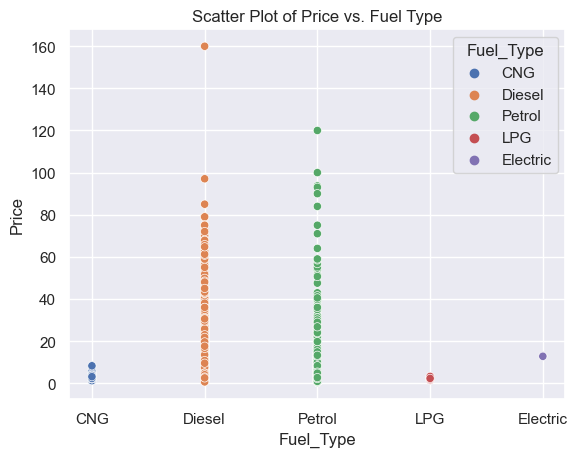

In [20]:
# PDF for Petrol vs Diesel as price of Disel is more than Petrol...will remove those who don't follow trends
sns.scatterplot(x='Fuel_Type', y='Price', data=data, hue='Fuel_Type')
plt.title('Scatter Plot of Price vs. Fuel Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.show() 

In [21]:
# # Location visualization
# var = 'Location'
# data[var].value_counts()
# # Mumbai has most number of cars to be sold followed by Hyderabad

#### Dealing with outliers

In [22]:
q = data['Price'].quantile(0.99)
New_data = data[data['Price']<q]
New_data.describe(include="all")

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5955.000000,5955.000000,5955,5955,5955,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3153,4299,4871,NaN,NaN,NaN,NaN,NaN
mean,2013.327792,57939.751805,NaN,NaN,NaN,18.186969,1604.672704,111.407583,5.279429,8.827228
std,3.265082,37898.192667,NaN,NaN,NaN,4.568673,574.161449,49.809908,0.797947,9.135809
min,1998.000000,171.000000,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,34232.500000,NaN,NaN,NaN,15.290000,1197.000000,76.800000,5.000000,3.500000
50%,2014.000000,53497.000000,NaN,NaN,NaN,18.200000,1493.000000,98.600000,5.000000,5.550000
75%,2016.000000,73000.000000,NaN,NaN,NaN,21.100000,1968.000000,136.000000,5.000000,9.635000


In [23]:
New_data2 = New_data[(New_data['Engine'] > 500) & (New_data['Engine'] < 3000)]
New_data2.describe(include="all")
# BC 72 cc chi gadi aste ka😂

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5904.000000,5904.000000,5904,5904,5904,5904.000000,5904.000000,5904.000000,5904.000000,5904.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3129,4297,4827,NaN,NaN,NaN,NaN,NaN
mean,2013.332995,57986.076558,NaN,NaN,NaN,18.253885,1586.808088,109.957957,5.276931,8.655644
std,3.260535,37947.011571,NaN,NaN,NaN,4.522435,538.215982,46.482240,0.783125,8.890641
min,1998.000000,171.000000,NaN,NaN,NaN,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2011.000000,34227.000000,NaN,NaN,NaN,15.400000,1197.000000,75.000000,5.000000,3.487500
50%,2014.000000,53576.000000,NaN,NaN,NaN,18.250000,1461.000000,98.590000,5.000000,5.500000
75%,2016.000000,73044.750000,NaN,NaN,NaN,21.100000,1968.000000,130.200000,5.000000,9.480000


In [24]:
#Power bc 500 ani 600 G*nd <300 max allowed haa ani 32 bhp chi gadi ky jhat upatnar...70 min phije
New_data3 = New_data2[(New_data2['Power'] > 50) & (New_data2['Power'] < 300)]
New_data3.describe(include="all")

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5728.000000,5728.000000,5728,5728,5728,5728.000000,5728.000000,5728.000000,5728.000000,5728.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3116,4142,4689,NaN,NaN,NaN,NaN,NaN
mean,2013.362954,58402.060056,NaN,NaN,NaN,18.176638,1605.882149,111.259312,5.291725,8.763900
std,3.227761,38139.350717,NaN,NaN,NaN,4.495961,523.967935,44.275307,0.776547,8.800291
min,1998.000000,600.000000,NaN,NaN,NaN,0.000000,799.000000,52.800000,2.000000,0.450000
25%,2012.000000,35000.000000,NaN,NaN,NaN,15.290000,1198.000000,78.900000,5.000000,3.550000
50%,2014.000000,54000.000000,NaN,NaN,NaN,18.160000,1496.000000,98.600000,5.000000,5.650000
75%,2016.000000,73688.750000,NaN,NaN,NaN,21.100000,1968.000000,136.000000,5.000000,9.600000


In [25]:
# 0 mileage vali car ka ghein koni?
New_data4 = New_data3[(New_data3['Mileage'] > 7) & (New_data3['Mileage'] < 30)]
New_data4.describe(include="all")

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5653.000000,5653.000000,5653,5653,5653,5653.000000,5653.000000,5653.000000,5653.000000,5653.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3089,4090,4640,NaN,NaN,NaN,NaN,NaN
mean,2013.410225,58224.439943,NaN,NaN,NaN,18.365467,1605.984064,111.225965,5.294711,8.739618
std,3.176616,38049.674446,NaN,NaN,NaN,4.030336,521.655112,44.361396,0.775944,8.701399
min,1998.000000,600.000000,NaN,NaN,NaN,8.200000,799.000000,52.800000,2.000000,0.450000
25%,2012.000000,35000.000000,NaN,NaN,NaN,15.500000,1198.000000,78.900000,5.000000,3.600000
50%,2014.000000,53841.000000,NaN,NaN,NaN,18.200000,1496.000000,98.600000,5.000000,5.700000
75%,2016.000000,73500.000000,NaN,NaN,NaN,21.100000,1968.000000,136.000000,5.000000,9.580000


In [26]:
# Seats approx 7 astat...
New_data5 = New_data4[(New_data4['Seats'] > 2) & (New_data4['Seats'] < 8)]
New_data5.describe(include="all")

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5518.000000,5518.000000,5518,5518,5518,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2962,3963,4537,NaN,NaN,NaN,NaN,NaN
mean,2013.455600,57350.226894,NaN,NaN,NaN,18.497763,1589.016838,111.232832,5.228706,8.759382
std,3.151386,37179.142668,NaN,NaN,NaN,3.980098,513.926857,44.767727,0.646426,8.772318
min,1998.000000,600.000000,NaN,NaN,NaN,8.200000,799.000000,52.800000,4.000000,0.450000
25%,2012.000000,34475.000000,NaN,NaN,NaN,15.800000,1198.000000,78.900000,5.000000,3.552500
50%,2014.000000,53000.000000,NaN,NaN,NaN,18.500000,1493.000000,98.590000,5.000000,5.665000
75%,2016.000000,72408.250000,NaN,NaN,NaN,21.100000,1968.000000,138.030000,5.000000,9.580000


In [27]:
# Seats approx 7 astat...
New_data6 = New_data5[(New_data5['Kilometers_Driven'] < 200000)]
New_data6.describe(include="all")

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5491.000000,5491.000000,5491,5491,5491,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2942,3940,4521,NaN,NaN,NaN,NaN,NaN
mean,2013.472774,56117.792205,NaN,NaN,NaN,18.511831,1587.510769,111.221108,5.226188,8.776565
std,3.140101,30801.045785,NaN,NaN,NaN,3.978359,513.550949,44.812073,0.643459,8.786951
min,1998.000000,600.000000,NaN,NaN,NaN,8.200000,799.000000,52.800000,4.000000,0.450000
25%,2012.000000,34208.000000,NaN,NaN,NaN,15.800000,1198.000000,78.900000,5.000000,3.590000
50%,2014.000000,52900.000000,NaN,NaN,NaN,18.500000,1468.000000,98.590000,5.000000,5.670000
75%,2016.000000,72000.000000,NaN,NaN,NaN,21.100000,1968.000000,138.030000,5.000000,9.600000


In [28]:
data_cleaned = New_data6.reset_index(drop=True)
data_cleaned.describe(include="all")

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5491.000000,5491.000000,5491,5491,5491,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000
unique,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2942,3940,4521,NaN,NaN,NaN,NaN,NaN
mean,2013.472774,56117.792205,NaN,NaN,NaN,18.511831,1587.510769,111.221108,5.226188,8.776565
std,3.140101,30801.045785,NaN,NaN,NaN,3.978359,513.550949,44.812073,0.643459,8.786951
min,1998.000000,600.000000,NaN,NaN,NaN,8.200000,799.000000,52.800000,4.000000,0.450000
25%,2012.000000,34208.000000,NaN,NaN,NaN,15.800000,1198.000000,78.900000,5.000000,3.590000
50%,2014.000000,52900.000000,NaN,NaN,NaN,18.500000,1468.000000,98.590000,5.000000,5.670000
75%,2016.000000,72000.000000,NaN,NaN,NaN,21.100000,1968.000000,138.030000,5.000000,9.600000


#### Handling Categorical data --> Droping unecessary features --> Multicollinearity --> Data splitting into train and test --> Feature Scaling

In [29]:
data_cleaned.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [30]:
# Handling 'Transmission',and 'Fuel_type' column with One Hot encoding they r Nominal......
data_with_dummies = pd.get_dummies(data_cleaned, columns=[ 'Transmission','Fuel_Type'], drop_first=True)
data_with_dummies

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,First,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0
1,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,1,1,0,0,0
2,2011,46000,First,18.20,1199.0,88.70,5.0,4.50,1,0,0,0,1
3,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,1,1,0,0,0
4,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,2015,70602,First,25.80,1498.0,98.60,5.0,4.83,1,1,0,0,0
5487,2014,27365,First,28.40,1248.0,74.00,5.0,4.75,1,1,0,0,0
5488,2015,100000,First,24.40,1120.0,71.00,5.0,4.00,1,1,0,0,0
5489,2013,46000,First,18.90,998.0,67.10,5.0,2.65,1,0,0,0,1


In [31]:
# Owner_type is in order...Order matter krtay ithe so LabelEncode
# Replace values in the "Owner_Type" column with specific numerical values
data_with_dummies['Owner_Type'] = data_with_dummies['Owner_Type'].replace({
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4
})
data_with_dummies.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,1,1,0,0,0
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,1,0,0,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,1,1,0,0,0
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0


In [35]:
df_dummy_final = data_with_dummies.copy()
df_dummy_final.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,1,1,0,0,0
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,1,0,0,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,1,1,0,0,0
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0


In [36]:
# Cols names ...
df_dummy_final.columns.values

array(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol'], dtype=object)

In [37]:
# Rearranging cols for convenience
cols = [ 'Price','Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol']

In [38]:
df7_final = df_dummy_final[cols]
df7_final.head()

,Price,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,1.75,2010,72000,1,26.60,998.0,58.16,5.0,1,0,0,0,0
1,12.50,2015,41000,1,19.67,1582.0,126.20,5.0,1,1,0,0,0
2,4.50,2011,46000,1,18.20,1199.0,88.70,5.0,1,0,0,0,1
3,6.00,2012,87000,1,20.77,1248.0,88.76,7.0,1,1,0,0,0
4,17.74,2013,40670,2,15.20,1968.0,140.80,5.0,0,1,0,0,0


In [39]:
df7_final.describe(include="all")

,Price,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
count,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000,5491.000000
mean,8.776565,2013.472774,56117.792205,1.195957,18.511831,1587.510769,111.221108,5.226188,0.717538,0.535786,0.000182,0.001821,0.454926
std,8.786951,3.140101,30801.045785,0.445408,3.978359,513.550949,44.812073,0.643459,0.450238,0.498763,0.013495,0.042640,0.498010
min,0.450000,1998.000000,600.000000,1.000000,8.200000,799.000000,52.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590000,2012.000000,34208.000000,1.000000,15.800000,1198.000000,78.900000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.670000,2014.000000,52900.000000,1.000000,18.500000,1468.000000,98.590000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.600000,2016.000000,72000.000000,1.000000,21.100000,1968.000000,138.030000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,55.760000,2019.000000,199000.000000,4.000000,28.400000,2999.000000,282.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Defining dependent and independent vars
X = df7_final.iloc[:, 1:].values
y = df7_final.iloc[:, 0:1].values
X[0]

array([2.010e+03, 7.200e+04, 1.000e+00, 2.660e+01, 9.980e+02, 5.816e+01,
       5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [41]:
# Splitting the data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [42]:
X_train[0]

array([2.015e+03, 5.400e+04, 1.000e+00, 2.440e+01, 1.120e+03, 7.100e+01,
       5.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [43]:
X_test

array([[2.0130e+03, 7.2000e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0140e+03, 5.8000e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0110e+03, 6.7612e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0120e+03, 5.5362e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 3.1400e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 1.0000e+05, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [44]:
y_train

array([[3.7 ],
       [2.3 ],
       [1.49],
       ...,
       [5.22],
       [6.5 ],
       [5.4 ]])

In [45]:
y_test 

array([[29.  ],
       [ 4.5 ],
       [11.5 ],
       ...,
       [ 4.25],
       [26.75],
       [17.75]])

In [46]:
# Feature Scaling !!!!!!!!
from sklearn.preprocessing import StandardScaler

# Define the columns to standardize (0, 1, 3, 4, 5, 6 : year,km,mileage,engine,power,seats)
columns_to_scale = [0, 1, 3, 4, 5, 6]

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
X_train[:, columns_to_scale] = scaler.fit_transform(X_train[:, columns_to_scale])
X_test[:, columns_to_scale] = scaler.transform(X_test[:, columns_to_scale])

### Below are just to check multicollinearity...

In [47]:
# Convert your standardized NumPy arrays to a pandas DataFrame
column_names = ['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol']  # Replace with your actual column names
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

In [48]:
dataaaaa = pd.concat([X_train_df, X_test_df], ignore_index=True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# variables = df9
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(dataaaaa.values, i) for i in range(dataaaaa.shape[1])]
vif["features"] = dataaaaa.columns
vif

,VIF,features
0,1.832046,Year
1,1.655316,Kilometers_Driven
2,9.125000,Owner_Type
3,3.396140,Mileage
4,7.869252,Engine
5,5.544375,Power
6,1.774157,Seats
7,6.489343,Transmission_Manual
8,8.192484,Fuel_Type_Diesel
9,1.002894,Fuel_Type_Electric


### Random Forest!!!

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=3)
rf_model.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=3)

In [51]:
y_pred = rf_model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[20.61 29.  ]
 [ 4.81  4.5 ]
 [13.38 11.5 ]
 ...
 [ 3.63  4.25]
 [22.97 26.75]
 [15.46 17.75]]


In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit (n_splits=10, test_size=0.2, random_state=0)
cross_val_score(RandomForestRegressor(), X, y, cv=cv)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(esti

array([0.92, 0.92, 0.91, 0.92, 0.89, 0.9 , 0.91, 0.92, 0.9 , 0.91])

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9128845326517973

In [54]:
# Adj R squared for Random Forest
r2 = rf_model.score(X_test,y_test)

n = X_test.shape[0]

p = X_test.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1)/(n - p - 1)

adj_r2

0.9119219308026458

In [55]:
# Pickle file
import pickle

In [56]:
# Serlializing my model using dump() and saving
with open('Random_Forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [57]:
# Loading it using load()
with open('Random_Forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [58]:
# Assuming 'scaler' is the name of your fitted StandardScaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [59]:
# Load the StandardScaler object (replace 'scaler.pkl' with the actual path)
with open('scaler.pkl', 'rb') as scaler_file:
    scalar = pickle.load(scaler_file)

In [60]:
def predict_price(year, km_driven, owner_type, mileage, engine, power, seats, transmission, fuel_type):
    


        # One-hot encode 'Transmission'
        transmission = 1 if transmission == 'Manual' else 0

        # Perform one-hot encoding for 'fuel_type'
        # fuel_type = pd.get_dummies([fuel_type], columns=['Fuel_Type'], drop_first=True)
        fuel_index = np.where(X.columns == fuel_type)[0][0]


        # Map 'Owner_Type' from user input to an integer
        owner_type_mapping = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}
        owner_type = owner_type_mapping.get(owner_type, 0)  # Default to 0 if not found

        # Prepare the input data as a NumPy array
        input_data = np.array([
            year, km_driven, owner_type, mileage,engine, power, seats, transmission]).reshape(-1,1)

        # Standardize the selected columns
        standardized_columns = [0, 1, 3, 4, 5, 6]
        input_data[:, standardized_columns] = scaler.transform(input_data[:, standardized_columns])

        input_data = np.hstack((input_data, fuel_type.reshape(1, -1)))

        X = np.zeros(len(X.columns))
        X[0] = year
        X[1] = km_driven
        X[2] = owner_type
        X[3] = mileage
        X[4] = engine
        X[5] = power
        X[6] = seats
        X[7] = transmission
        if fuel_index>=0:
                X[fuel_index] = 1

        # Make a prediction using the model
        predicted_price = loaded_model.predict(X)[0]
        
        return predict_price[0]

